<a href="https://www.kaggle.com/code/oluwakoredealashe/salary-database-management-with-sql-python?scriptVersionId=215821229" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/Korey01/Korey01/blob/main/COMPLETE%20SALARIES_DATABASE_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Salary Database Management with SQL and Python

This notebook demonstrates fundamental skills in SQL database management using Python. It showcases operations such as inserting, deleting, and retrieving data, while integrating Python for data manipulation and visualization. These are critical skills for any data analyst.

The dataset is fictional and consists of employee records, including details such as Staff Serial Number (SSN), names, department codes, department names, and salaries.

## Objectives
- Perform basic SQL operations like `INSERT`, `DELETE`, and `SELECT`.
- Visualize salary distributions with Python.
- Demonstrate handling and correcting database integrity issues.



## Dataset Description
The database consists of an `Employees` table with the following structure:
- **SSN**: Staff Serial Number (unique identifier for each employee).
- **FirstName**: First name of the employee.
- **LastName**: Last name of the employee.
- **DepartmentCode**: Numeric code representing the employee's department.
- **DepartmentName**: Name of the department.
- **Salary**: Employee's salary.

The dataset is designed for demonstration purposes and does not represent real-world data.


In [1]:
#Import the relevant libraries to create, manipulate and manage the database.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('test.db')
import sqlalchemy

In [2]:
# Creating the Departments table using the SQLite3 connection
conn.execute('''
  CREATE TABLE Departments (
      Code INTEGER PRIMARY KEY NOT NULL,         -- Unique code for the department
      DepartmentName NVARCHAR NOT NULL,          -- Name of the department
      Budget REAL NOT NULL                       -- Budget allocated to the department
  );
''')

# Commit the changes to save the table creation
conn.commit()

# Inform the user that the Departments table has been created
print('Departments Table created')


Departments Table created


In [3]:
# Creating the Employees table using the SQLite3 connection
conn.execute('''
  CREATE TABLE Employees (
    SSN INTEGER PRIMARY KEY NOT NULL,                     -- Social Security Number (Unique identifier)
    FirstName TEXT NOT NULL,                              -- First name of the employee
    LastName NVARCHAR NOT NULL,                           -- Last name of the employee
    DepartmentCode INTEGER NOT NULL,                      -- Code of the department (foreign key)
    DepartmentName NVARCHAR NOT NULL,                     -- Name of the department
    Salary INTEGER NOT NULL,                              -- Salary of the employee
    CONSTRAINT fk_Departments_Code FOREIGN KEY (DepartmentCode)
    REFERENCES Departments (Code)                         -- Foreign key references Departments table
  );
''')

# Commit the changes to save the table creation
conn.commit()

# Inform the user that the Employees table has been created
print('Employees Table Created')


Employees Table Created


In [4]:
# Adding rows to the Departments table using the SQLite connection
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(14, 'IT', 65000);")  # IT Department
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(01, 'Finance', 55000);")  # Finance Department
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(08, 'Human Capital', 45000);")  # Human Capital Department
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(18, 'Sales', 50000);")  # Sales Department


In [5]:
# Adding rows to the Employees table
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0003', 'Faith', 'Pembe', 14, 'IT', 1500);")  # IT Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0010', 'Joy', 'Sasha', 01, 'Finance', 1300);")  # Finance Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0007', 'Plain', 'Smart', 14, 'IT', 1700);")  # IT Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0004', 'Hush', 'Baby', 18, 'Sales', 1200);")  # Sales Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0011', 'Given', 'Vibes', 18, 'Sales', 1400);")  # Sales Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0006', 'Lovely', 'Daise', 08, 'Human Capital', 1500);")  # Human Capital Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0015', 'James', 'Bund', 14, 'IT', 1500);")  # IT Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0008', 'Josh', 'Tufune', 01, 'Finance', 1700);")  # Finance Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0076', 'Gayme', 'Tymz', 01, 'Finance', 1900);")  # Finance Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0002', 'Funny', 'Bonez', 08, 'Human Capital', 1600);")  # Human Capital Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0005', 'Googney', 'Tunez', 18, 'Sales', 1700);")  # Sales Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0543', 'Bale', 'Pembe', 18, 'Sales', 1700);")  # Sales Department
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0049', 'Bale', 'Lalupon', 01, 'Finance', 1500);")  # Finance Department

# Commit the changes to save the inserted data
conn.commit()


In [6]:

# Connect to the test database (or create it if it doesn't exist)
conn = sqlite3.connect('test.db')

# Execute a query to select all rows from the Departments table
cursor = conn.execute('''SELECT * FROM Departments''')

# Iterate through the result set and print each row
for row in cursor:
    print(row)  # Display the row contents


(1, 'Finance', 55000.0)
(8, 'Human Capital', 45000.0)
(14, 'IT', 65000.0)
(18, 'Sales', 50000.0)


In [7]:
# Execute a query to select all rows from the Employees table
cursor = conn.execute('''SELECT * FROM Employees''')

# Iterate through the result set and print each row
for row in cursor:
    print(row)  # Display the row contents


(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(4, 'Hush', 'Baby', 18, 'Sales', 1200)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(10, 'Joy', 'Sasha', 1, 'Finance', 1300)
(11, 'Given', 'Vibes', 18, 'Sales', 1400)
(15, 'James', 'Bund', 14, 'IT', 1500)
(49, 'Bale', 'Lalupon', 1, 'Finance', 1500)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)
(543, 'Bale', 'Pembe', 18, 'Sales', 1700)


In [8]:
# Query to select and concatenate FirstName and LastName as FullName from the Employees table
cursor = conn.execute('''
    SELECT FirstName || ' ' || LastName AS FullName
    FROM Employees;
''')

# Note: In SQLite, the `||` operator is used for string concatenation instead of the CONCAT() function.

# Iterate through the result set and print the FullName for each employee
for row in cursor:
    print(row[0])  # Display the concatenated full name


Funny Bonez
Faith Pembe
Hush Baby
Googney Tunez
Lovely Daise
Plain Smart
Josh Tufune
Joy Sasha
Given Vibes
James Bund
Bale Lalupon
Gayme Tymz
Bale Pembe


##PROBLEM STATEMENTS


**Select all the data of employees that work in department 1 and department 14)**

In [9]:
# Use the cursor variable with the conn object to execute a query
cursor = conn.execute('''
  SELECT *
  FROM Employees
  WHERE DepartmentCode IN (1, 14);  -- Filter employees in departments with codes 1 or 14
''')

# Iterate through the queried rows and print each one
for row in cursor:
    print(row)  # Display the output for each row


(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(10, 'Joy', 'Sasha', 1, 'Finance', 1300)
(15, 'James', 'Bund', 14, 'IT', 1500)
(49, 'Bale', 'Lalupon', 1, 'Finance', 1500)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)


**Select all employes with Salary starting from 1,400.00**

In [10]:
# Use the cursor variable with the conn object to execute a query
cursor = conn.execute('''
  SELECT *
  FROM Employees
  WHERE Salary >= 1400;  -- Filter employees with a salary of 1400 or higher
''')

# Iterate through the queried rows and print each one
for row in cursor:
    print(row)  # Display the output for each row


(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(11, 'Given', 'Vibes', 18, 'Sales', 1400)
(15, 'James', 'Bund', 14, 'IT', 1500)
(49, 'Bale', 'Lalupon', 1, 'Finance', 1500)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)
(543, 'Bale', 'Pembe', 18, 'Sales', 1700)


**Select all employes with Salary below 1,400.00**

In [11]:
# Use the cursor variable with the conn object to execute a query
cursor = conn.execute('''
  SELECT *
  FROM Employees
  WHERE Salary < 1400;  -- Filter employees with a salary less than 1400
''')

# Iterate through the queried rows and print each one
for row in cursor:
    print(row)  # Display the output for each row


(4, 'Hush', 'Baby', 18, 'Sales', 1200)
(10, 'Joy', 'Sasha', 1, 'Finance', 1300)


**We are implementing a Length of Service benefit initiative, which involves awarding gift cards to five employees who have been with the company for over two years. To ensure fairness, we aim to prioritize those with the longest tenure. We also know that all staff with SSNs of 0020 or below have been with the company for at least two years. Please generate a list of employees who qualify for this benefit.**

In [12]:
# Use the cursor variable with the conn object to execute a query
cursor = conn.execute('''
  SELECT *
  FROM Employees
  WHERE SSN <= '0020'  -- Filter employees with SSN less than or equal to '0020'
  LIMIT 5;             -- Limit the result to the first 5 rows
''')

# Iterate through the queried rows and print each one
for row in cursor:
    print(row)  # Display the output for each row


(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(4, 'Hush', 'Baby', 18, 'Sales', 1200)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)


**What percentage of finance department budget is currently being utilized?**

In [13]:
# Execute a query to calculate the percentage of budget utilized by the Finance department
cursor = conn.execute('''
  SELECT ROUND(
    (SELECT SUM(Salary) FROM Employees
     WHERE DepartmentCode = 1)
    /
    (SELECT SUM(Budget) FROM Departments
     WHERE DepartmentName = 'Finance') * 100, 2
  ) AS Result;
''')

# Iterate through the query result and print a formatted statement
for row in cursor:
    print(f"Finance is utilizing {row[0]} percent of their budget")


Finance is utilizing 11.64 percent of their budget


**What is the average salary for all the departments?**

In [14]:
# Create a variable "cursor" and execute an SQL query using the SQLite connection
cursor = conn.execute('''
  SELECT AVG(Salary) AS AverageSalary, DepartmentCode, DepartmentName
  FROM Employees
  GROUP BY DepartmentName;  -- Group results by department name to calculate the average salary per department
''')

# Iterate through the query results and print each row
for row in cursor:
    print(row)  # Display the average salary, department code, and department name


(1600.0, 1, 'Finance')
(1550.0, 8, 'Human Capital')
(1566.6666666666667, 14, 'IT')
(1500.0, 18, 'Sales')


**Plot a bar chat to show the distribution of salaries per department**

In [15]:
# Create a DataFrame by using pd.read_sql to fetch data from the Departments table in the database
df_departments = pd.read_sql('SELECT * FROM Departments', conn)

# Print the resulting DataFrame to display the contents of the Departments table
print(df_departments)


   Code DepartmentName   Budget
0     1        Finance  55000.0
1     8  Human Capital  45000.0
2    14             IT  65000.0
3    18          Sales  50000.0


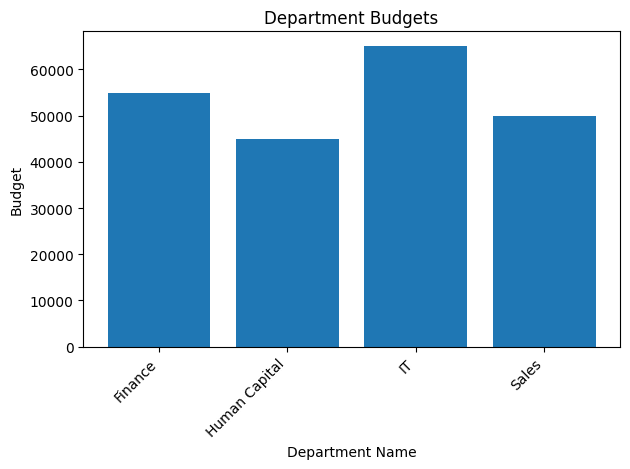

In [16]:
# Plot a bar chart to visualize the budgets of each department
plt.bar(df_departments['DepartmentName'], df_departments['Budget'])

# Add labels and title to the chart
plt.xlabel('Department Name')  # Label for the x-axis
plt.ylabel('Budget')          # Label for the y-axis
plt.title('Department Budgets')  # Title of the chart

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout to ensure labels and titles fit within the figure
plt.tight_layout()

# Display the plot
plt.show()


**Plot a Pie chart to show the proportion of staf per department.**

In [17]:
# Create a DataFrame by using pd.read_sql to execute an SQL query and fetch data from the Employees table
df_employees = pd.read_sql('SELECT * FROM Employees', conn)

# Display the resulting DataFrame to show the contents of the Employees table
df_employees


,SSN,FirstName,LastName,DepartmentCode,DepartmentName,Salary
0,2,Funny,Bonez,8,Human Capital,1600
1,3,Faith,Pembe,14,IT,1500
2,4,Hush,Baby,18,Sales,1200
3,5,Googney,Tunez,18,Sales,1700
4,6,Lovely,Daise,8,Human Capital,1500
5,7,Plain,Smart,14,IT,1700
6,8,Josh,Tufune,1,Finance,1700
7,10,Joy,Sasha,1,Finance,1300
8,11,Given,Vibes,18,Sales,1400
9,15,James,Bund,14,IT,1500


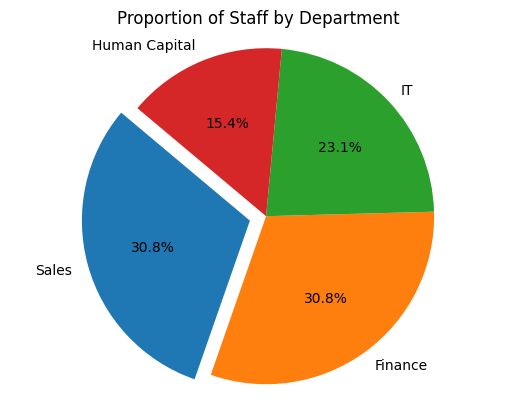

In [18]:
# Count the number of employees in each department
department_counts = df_employees['DepartmentName'].value_counts()

# Extract labels (department names) and sizes (number of employees) for the pie chart
labels = department_counts.index
sizes = department_counts.values

# Create an explode configuration to emphasize the first slice (adjust as needed)
explode = (0.1, 0, 0, 0)

# Plot the pie chart
plt.pie(
    sizes,
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=140      # Start angle for better orientation
)

# Ensure the pie chart is a perfect circle
plt.axis('equal')

# Add a title to the pie chart
plt.title('Proportion of Staff by Department')

# Display the pie chart
plt.show()


**Plot a scatter chart to show thesalary distribution.**

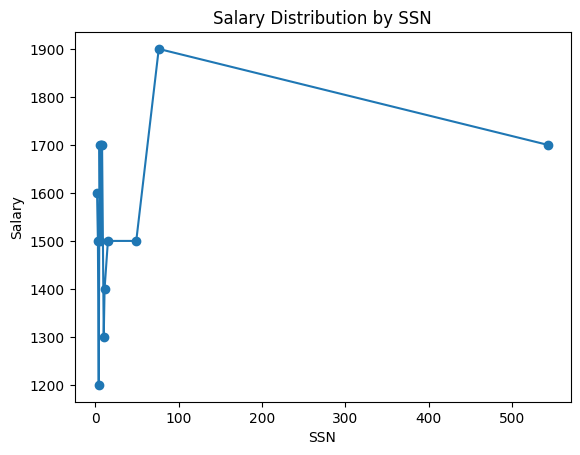

In [19]:
# Sort by SSN and plot salaries
df_sorted = df_employees.sort_values('SSN')
plt.plot(df_sorted['SSN'], df_sorted['Salary'], marker='o', linestyle='-')
plt.xlabel('SSN')
plt.ylabel('Salary')
plt.title('Salary Distribution by SSN')
plt.show()


The plot shows a general trend of increasing salaries with higher SSNs, suggesting potential links to seniority or experience. Notably, some newer employees also receive high salaries, likely reflecting specialized skills or expertise.

This version is more concise and easier to read while still conveying the key insights. Let me know if you'd like further adjustments!








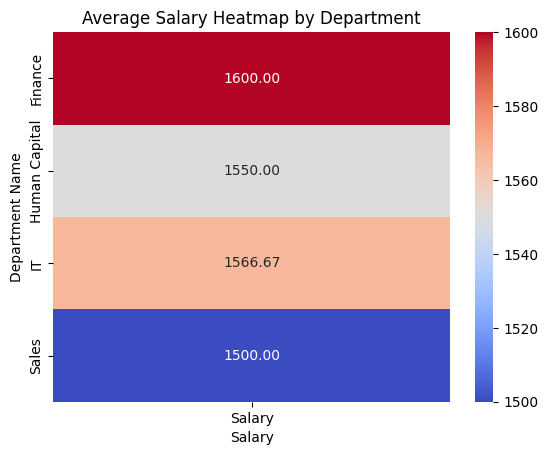

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for heatmap
heatmap_data = df_employees.pivot_table(index='DepartmentName', values='Salary', aggfunc='mean')

# Create heatmap with formatted annotations to show actual averages
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')  # fmt=".2f" shows numbers with 2 decimal places
plt.title('Average Salary Heatmap by Department')
plt.xlabel('Salary')  # Add x-axis label
plt.ylabel('Department Name')  # Add y-axis label
plt.show()


We can see from the Heatmap above that Finance has the highest average salary
 whilst sales has the lowest.

## **Database Management Scenario: Ensuring Data Integrity**

This section addresses a real-world scenario where database integrity was compromised due to unauthorized modifications. We demonstrate how to detect and correct such issues using SQL and Python.

## Scenario 1
**James Bund, a data administrator, made an unprofessional decision by excluding a staff member's (Bale Lalupon) details from the Salaries database due to personal bias. This action was later discovered, leading to his dismissal from the organization. What steps did he take to carry out this exclusion?**

In [21]:
# Connect to the database
conn = sqlite3.connect('test.db')

# Corrected SQL query to delete an entry from the Employees table
delete_bale_query = (
    "DELETE FROM Employees WHERE SSN = 49 OR (LastName = 'Bale' AND FirstName = 'Lalupon');"
)
conn.execute(delete_bale_query)  # Execute the deletion query
conn.commit()  # Commit the changes to save the deletion

# Verify the result of the deletion by retrieving all entries from the Employees table
cursor = conn.execute('''
  SELECT *
  FROM Employees;
''')

# Iterate through the query results and display the updated table
for row in cursor:
    print(row)


(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(4, 'Hush', 'Baby', 18, 'Sales', 1200)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(10, 'Joy', 'Sasha', 1, 'Finance', 1300)
(11, 'Given', 'Vibes', 18, 'Sales', 1400)
(15, 'James', 'Bund', 14, 'IT', 1500)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)
(543, 'Bale', 'Pembe', 18, 'Sales', 1700)


### **Data Recovery and Employee Onboarding**

As part of the onboarding process for a new team member, this section highlights how to rectify past errors and ensure accurate database updates. This includes managing deletions, re-insertions, and new entries.

## Scenario 2

**Two weeks later, a new employee, Julie Shanks, was hired to fill the position previously held by James Bund. Due to her extensive experience, she was offered a salary of $2,000. As part of her initial responsibilities, Julie needed to**

- Remove James Bund's profile from the database.
- Restore Bale Lalupon's record to the database.
- Add her own profile to the database.
How would she have approached these tasks?

In [22]:
# Perform multiple database operations: Delete, Re-add, and Insert entries
try:
    # Delete James Bund from the database
    delete_James = "DELETE FROM Employees WHERE SSN = 15;"
    conn.execute(delete_James)
    conn.commit()  # Save the deletion
    print("Successfully deleted James Bund from the database.")
except sqlite3.Error as e:
    print(f"Error deleting James Bund: {e}")

try:
    # Re-add Bale Lalupon to the database
    re_add_Lalupon = (
        "INSERT INTO Employees (SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) "
        "VALUES ('0053', 'Bale', 'Lalupon', 01, 'Finance', 1500);"
    )
    conn.execute(re_add_Lalupon)
    conn.commit()  # Save the insertion
    print("Successfully re-added Bale Lalupon to the database.")
except sqlite3.Error as e:
    print(f"Error re-adding Bale Lalupon: {e}")

try:
    # Add Julie Shanks to the database
    add_Julie_Shanks = (
        "INSERT INTO Employees (SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) "
        "VALUES ('0765', 'Julie', 'Shanks', 18, 'IT', 2000);"
    )
    conn.execute(add_Julie_Shanks)
    conn.commit()  # Save the insertion
    print("Successfully added Julie Shanks to the database.")
except sqlite3.Error as e:
    print(f"Error adding Julie Shanks: {e}")


Successfully deleted James Bund from the database.
Successfully re-added Bale Lalupon to the database.
Successfully added Julie Shanks to the database.



### Final Database State

The table below shows the final state of the `Employees` table after all corrective actions were taken.


In [23]:
# Fetch all rows from the Employees table into a DataFrame
Updated_DB_df = pd.read_sql("SELECT * FROM Employees", conn)

# Display the updated DataFrame to show the current state of the Employees table
Updated_DB_df



,SSN,FirstName,LastName,DepartmentCode,DepartmentName,Salary
0,2,Funny,Bonez,8,Human Capital,1600
1,3,Faith,Pembe,14,IT,1500
2,4,Hush,Baby,18,Sales,1200
3,5,Googney,Tunez,18,Sales,1700
4,6,Lovely,Daise,8,Human Capital,1500
5,7,Plain,Smart,14,IT,1700
6,8,Josh,Tufune,1,Finance,1700
7,10,Joy,Sasha,1,Finance,1300
8,11,Given,Vibes,18,Sales,1400
9,53,Bale,Lalupon,1,Finance,1500



## Conclusion

This notebook demonstrated SQL operations integrated with Python for database management. Key takeaways include:
- Performing CRUD operations with SQL.
- Visualizing data insights with Python.
- Addressing and correcting data integrity issues.

These examples showcase fundamental skills relevant for a data analyst portfolio.
